# MURSST - Append Test

Can we append the North Atlantic and South Atlantic pieces together for a given timestep?

In [1]:
# Libraries
import os
import xarray as xr

# Where is the data:
uname = "akemberling"

# the f"" thing is called an fstring, think of it like paste/str_c/glue
data_path = f"/Users/{uname}/Downloads"

In [2]:
# Use this to check working directory:

# Backing up three levels in this case, definitely better code for this, but results are results
os.chdir(data_path)
os.getcwd()

'/Users/akemberling/Downloads'

In [12]:
# Load each file on their own
mur_north = xr.open_dataset(f"mur_2022-10-10_Upper.nc")
mur_south = xr.open_dataset(f"mur_2022-10-10_Lower.nc")

In [13]:
# This is what it looks like (data is not in memory yet)
mur_north

<xarray.Dataset>
Dimensions:       (time: 1, latitude: 3501, longitude: 14001)
Coordinates:
  * time          (time) datetime64[ns] 2022-10-10T09:00:00
  * latitude      (latitude) float32 35.0 35.01 35.02 35.03 ... 69.98 69.99 70.0
  * longitude     (longitude) float32 -100.0 -99.99 -99.98 ... 39.98 39.99 40.0
Data variables:
    analysed_sst  (time, latitude, longitude) float64 ...
Attributes: (12/50)
    acknowledgement:            Please acknowledge the use of these data with...
    cdm_data_type:              Grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    Conventions:                CF-1.6, COARDS, ACDD-1.3
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    creator_name:               JPL MUR SST project
    ...                         ...
    summary:                    This is a merged, multi-sensor L4 Foundation ...
    testOutOfDate:              now-3days
    time_coverage_end:          2022-10-10T09:00:00Z
    time_coverage_start:        2022-10-10T09:00:00Z
    title:                      Multi-scale Ultra-high Resolution (MUR) SST A...
    Westernmost_Easting:        -100.0

In [17]:
# And for the south
mur_south

<xarray.Dataset>
Dimensions:       (time: 1, latitude: 3501, longitude: 14001)
Coordinates:
  * time          (time) datetime64[ns] 2022-10-10T09:00:00
  * latitude      (latitude) float32 0.0 0.01 0.02 0.03 ... 34.98 34.99 35.0
  * longitude     (longitude) float32 -100.0 -99.99 -99.98 ... 39.98 39.99 40.0
Data variables:
    analysed_sst  (time, latitude, longitude) float64 ...
Attributes: (12/50)
    acknowledgement:            Please acknowledge the use of these data with...
    cdm_data_type:              Grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    Conventions:                CF-1.6, COARDS, ACDD-1.3
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    creator_name:               JPL MUR SST project
    ...                         ...
    summary:                    This is a merged, multi-sensor L4 Foundation ...
    testOutOfDate:              now-3days
    time_coverage_end:          2022-10-10T09:00:00Z
    time_coverage_start:        2022-10-10T09:00:00Z
    title:                      Multi-scale Ultra-high Resolution (MUR) SST A...
    Westernmost_Easting:        -100.0

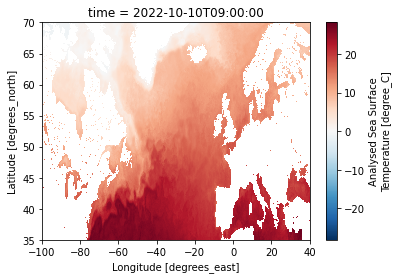

In [14]:
# Can plot if we want
mur_north.isel(time = 0).analysed_sst.plot()

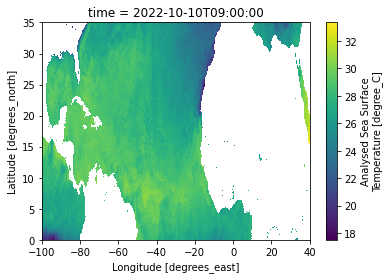

In [15]:
# Can plot if we want
mur_south.isel(time = 0).analysed_sst.plot()

## Appending North and South

I think xarray's concat function is what we need in this case: `xr.concat()`

In [18]:
# Concatenate along latitude dimension
merged_ds = xr.concat([mur_south, mur_north], dim='latitude', coords='all')
merged_ds

<xarray.Dataset>
Dimensions:       (time: 1, latitude: 7002, longitude: 14001)
Coordinates:
  * time          (time) datetime64[ns] 2022-10-10T09:00:00
  * latitude      (latitude) float64 0.0 0.01 0.02 0.03 ... 69.98 69.99 70.0
  * longitude     (longitude) float32 -100.0 -99.99 -99.98 ... 39.98 39.99 40.0
Data variables:
    analysed_sst  (time, latitude, longitude) float64 20.1 20.09 ... 7.849 7.849
Attributes: (12/50)
    acknowledgement:            Please acknowledge the use of these data with...
    cdm_data_type:              Grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    Conventions:                CF-1.6, COARDS, ACDD-1.3
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    creator_name:               JPL MUR SST project
    ...                         ...
    summary:                    This is a merged, multi-sensor L4 Foundation ...
    testOutOfDate:              now-3days
    time_coverage_end:          2022-10-10T09:00:00Z
    time_coverage_start:        2022-10-10T09:00:00Z
    title:                      Multi-scale Ultra-high Resolution (MUR) SST A...
    Westernmost_Easting:        -100.0

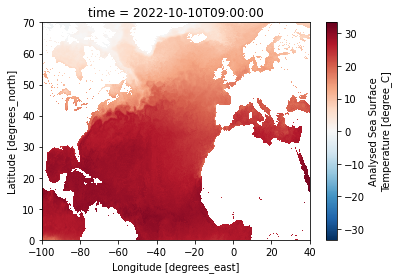

In [19]:
merged_ds.isel(time = 0).analysed_sst.plot()

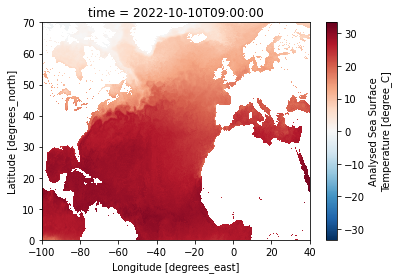

In [3]:
# Can you open with xr.open_mfdataset - yes
# Load them as one dataset, using a list of file paths []
merged_mf = xr.open_mfdataset([f"mur_2022-10-10_Lower.nc", f"mur_2022-10-10_Upper.nc"])

# Plot the first timestep's analysed_sst
merged_mf.isel(time = 0).analysed_sst.plot()

In [29]:
# How do the dimensions compare to oisst, for estimating size
merged_mf.dims

Frozen({'time': 1, 'latitude': 7002, 'longitude': 14001})

In [4]:
# Save one
merged_mf.to_netcdf("merged_mur.nc")